In [1]:
import scipy.io as sio

data = sio.loadmat('Coactivation_matrix.mat')
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [2]:
import numpy as np
import networkx as nx

mat = sio.loadmat('Coactivation_matrix.mat')
A = mat['Coactivation_matrix'] 
A = np.maximum(A, A.T)
G = nx.from_numpy_array(A)


In [3]:
C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G)

G_rand = nx.configuration_model([d for n, d in G.degree()])
G_rand = nx.Graph(G_rand)  # quitar multiedges
G_rand.remove_edges_from(nx.selfloop_edges(G_rand))

C_rand = nx.average_clustering(G_rand)
L_rand = nx.average_shortest_path_length(G_rand)

small_worldness = (C / C_rand) / (L / L_rand)
print("Coeficiente de mundo pequeño:", small_worldness)


Coeficiente de mundo pequeño: 2.469614140116344


In [4]:
from networkx.algorithms.community import louvain_communities

comunidades = louvain_communities(G, seed=42)
print("Número de comunidades:", len(comunidades))


Número de comunidades: 5


In [5]:
bet = nx.betweenness_centrality(G)
sorted_hubs = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 hubs (por betweenness):", sorted_hubs)


Top 5 hubs (por betweenness): [(330, 0.009783595551896835), (621, 0.009157736618542002), (546, 0.008545752999067208), (339, 0.008064692726742848), (629, 0.00785775798689866)]


In [6]:
def global_efficiency(G):
    inv_dist = []
    for node in G:
        path_lengths = nx.single_source_shortest_path_length(G, node)
        inv_dist.extend([1 / d for d in path_lengths.values() if d > 0])
    return np.mean(inv_dist)

E_global = global_efficiency(G)
print("Eficiencia global:", E_global)


Eficiencia global: 0.49492420551533856


In [8]:
import networkx as nx

E_local = nx.local_efficiency(G)
print("Eficiencia local:", E_local)


Eficiencia local: 0.6643934695960994


In [9]:
for node, degree in G.degree():
    print(f"Nodo {node}: grado = {degree}")


Nodo 0: grado = 32
Nodo 1: grado = 26
Nodo 2: grado = 38
Nodo 3: grado = 37
Nodo 4: grado = 29
Nodo 5: grado = 58
Nodo 6: grado = 88
Nodo 7: grado = 124
Nodo 8: grado = 29
Nodo 9: grado = 57
Nodo 10: grado = 54
Nodo 11: grado = 59
Nodo 12: grado = 44
Nodo 13: grado = 49
Nodo 14: grado = 50
Nodo 15: grado = 36
Nodo 16: grado = 124
Nodo 17: grado = 49
Nodo 18: grado = 86
Nodo 19: grado = 109
Nodo 20: grado = 73
Nodo 21: grado = 37
Nodo 22: grado = 62
Nodo 23: grado = 47
Nodo 24: grado = 31
Nodo 25: grado = 54
Nodo 26: grado = 20
Nodo 27: grado = 35
Nodo 28: grado = 27
Nodo 29: grado = 40
Nodo 30: grado = 30
Nodo 31: grado = 42
Nodo 32: grado = 31
Nodo 33: grado = 37
Nodo 34: grado = 29
Nodo 35: grado = 56
Nodo 36: grado = 49
Nodo 37: grado = 108
Nodo 38: grado = 149
Nodo 39: grado = 73
Nodo 40: grado = 78
Nodo 41: grado = 114
Nodo 42: grado = 120
Nodo 43: grado = 123
Nodo 44: grado = 126
Nodo 45: grado = 76
Nodo 46: grado = 90
Nodo 47: grado = 43
Nodo 48: grado = 51
Nodo 49: grado = 34
N

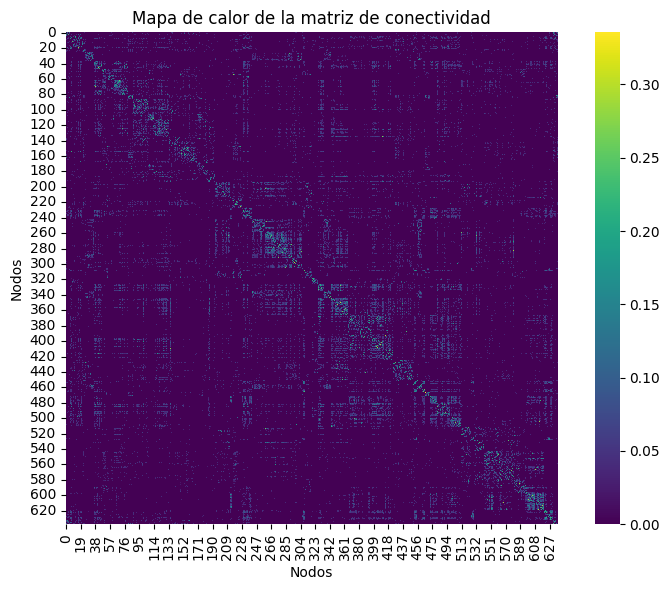

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(A, cmap='viridis', square=True)
plt.title("Mapa de calor de la matriz de conectividad")
plt.xlabel("Nodos")
plt.ylabel("Nodos")
plt.tight_layout()
plt.show()


In [11]:
np.fill_diagonal(A, 0)

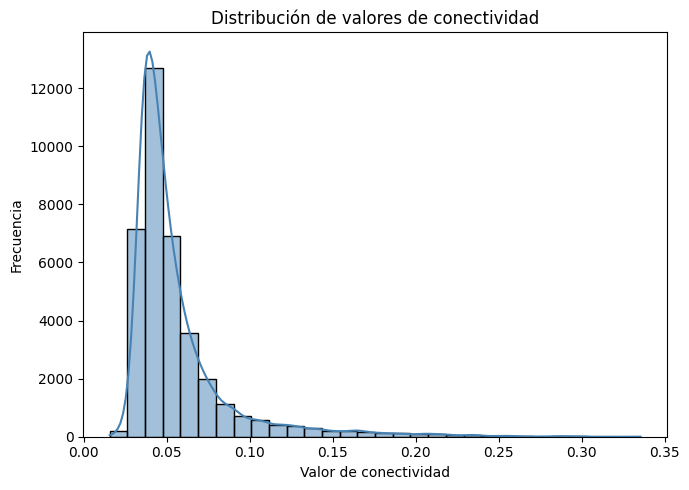

In [13]:
# Aplanar la matriz (convertir a una sola lista de valores)
values = A.flatten()

# Eliminar valores nulos o la diagonal (autoconexiones)
values = values[values != 0]

plt.figure(figsize=(7, 5))
sns.histplot(values, kde=True, bins=30, color='steelblue')
plt.title("Distribución de valores de conectividad")
plt.xlabel("Valor de conectividad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [14]:
np.fill_diagonal(A, 0)  # eliminamos autoconexiones

# Calcular percentiles
p25, p50, p75 = np.percentile(A[A > 0], [25, 50, 75])

print("Percentil 0.25:", p25)
print("Percentil 0.5:", p50)
print("Percentil 0.75:", p75)

Percentil 0.25: 0.03832752613240418
Percentil 0.5: 0.046052631578947366
Percentil 0.75: 0.06053268765133172


In [15]:
def filtrar_grafo(A, umbral):
    A_filtrada = np.where(A >= umbral, A, 0)
    G = nx.from_numpy_array(A_filtrada)
    return G

G25 = filtrar_grafo(A, p25)
G50 = filtrar_grafo(A, p50)
G75 = filtrar_grafo(A, p75)

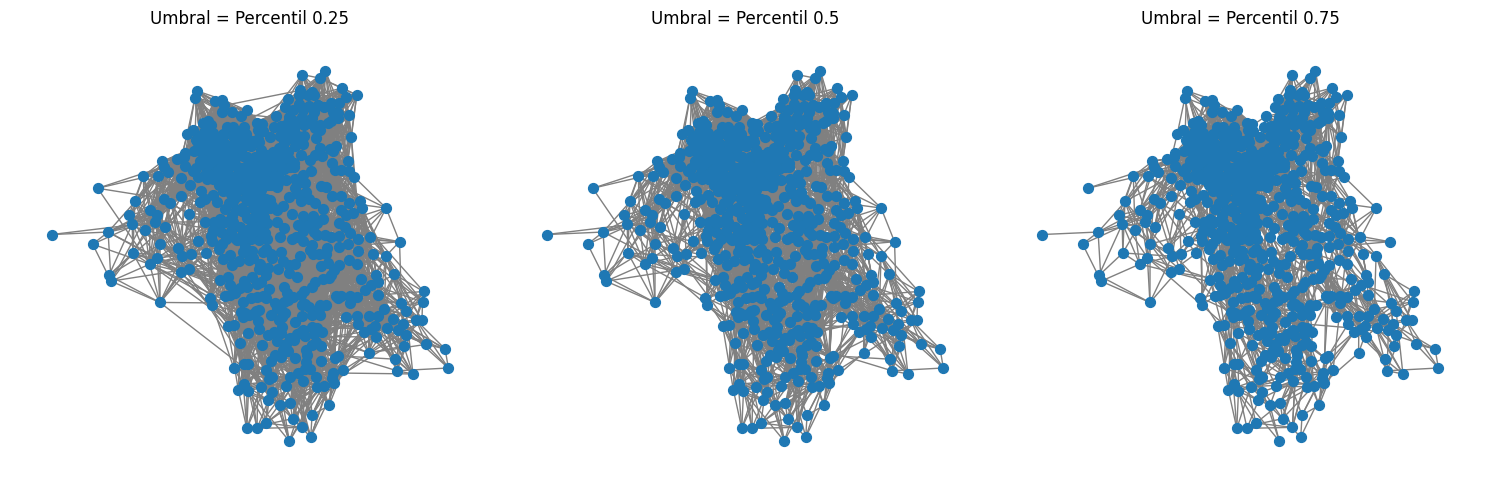

In [16]:
pos = nx.spring_layout(G25, seed=42)  # mismas posiciones para comparar

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
nx.draw(G25, pos, node_size=50, edge_color='gray')
plt.title("Umbral = Percentil 0.25")

plt.subplot(1, 3, 2)
nx.draw(G50, pos, node_size=50, edge_color='gray')
plt.title("Umbral = Percentil 0.5")

plt.subplot(1, 3, 3)
nx.draw(G75, pos, node_size=50, edge_color='gray')
plt.title("Umbral = Percentil 0.75")

plt.tight_layout()
plt.show()

In [65]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"


pos = nx.spring_layout(G, dim=3, seed=42)
#cord nodos
x_nodes = [pos[k][0] for k in G.nodes()]
y_nodes = [pos[k][1] for k in G.nodes()]
z_nodes = [pos[k][2] for k in G.nodes()]
#cord aristazs
edge_x = []
edge_y = []
edge_z = []
edge_color = []

for i, j in G.edges():
    edge_x += [pos[i][0], pos[j][0], None]
    edge_y += [pos[i][1], pos[j][1], None]
    edge_z += [pos[i][2], pos[j][2], None]
    edge_color.append(A[i, j])  

degree = dict(G.degree())
node_size = np.array([degree[n] for n in G.nodes()])
node_size = 5 + (node_size / np.max(node_size)) * 15  # escala visual

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(
        color=edge_color,
        colorscale='Hot',
        width=2
    ),
    hoverinfo='none'
)

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers',
    marker=dict(
        symbol='circle',
        size=node_size,
        color='red',
        opacity=0.8
    ),
    hoverinfo='text',
    text=[f'Nodo {n}<br>Grado: {degree[n]}' for n in G.nodes()]
)


fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Grafo 3D de Conectividad",
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)


fig.show()


In [23]:
import mne

ruta = r"C:\Users\shade\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
raw = mne.io.read_raw_edf(ruta, preload=True)
print(raw)


Extracting EDF parameters from C:\Users\shade\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected


C:\Users\shade\AppData\Local\Temp\ipykernel_9508\2011876731.py:4: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MiB, data loaded>


In [24]:
data = raw.get_data()

In [52]:
corr_matrix = np.corrcoef(data)
corr_matrix[np.isnan(corr_matrix)] = 0  # quitar NaN
np.fill_diagonal(corr_matrix, 0)   

In [56]:
umbral = np.percentile(corr_matrix[corr_matrix > 0], 25)
A_filtrada = np.where(corr_matrix >= umbral, corr_matrix, 0)

In [57]:
G = nx.from_numpy_array(A_filtrada)

In [59]:
# Tomar solo el mayor componente conectado
if not nx.is_connected(G):
    Gc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
else:
    Gc = G


In [60]:
C = nx.average_clustering(Gc)
L = nx.average_shortest_path_length(Gc)

# Grafo aleatorio equivalente
G_rand = nx.configuration_model([d for n, d in Gc.degree()])
G_rand = nx.Graph(G_rand)
G_rand.remove_edges_from(nx.selfloop_edges(G_rand))

C_rand = nx.average_clustering(G_rand)
L_rand = nx.average_shortest_path_length(G_rand)

small_worldness = (C / C_rand) / (L / L_rand)
print("Coeficiente de mundo pequeño:", small_worldness)


Coeficiente de mundo pequeño: 1.7457578398070792


In [61]:
# === 6. Comunidades ===
comunidades = community.greedy_modularity_communities(G)
print(f"Número de comunidades detectadas: {len(comunidades)}")

Número de comunidades detectadas: 4


In [62]:
grados = dict(G.degree())
hubs = sorted(grados.items(), key=lambda x: x[1], reverse=True)[:5]
print("Hubs (top 5 por grado):", hubs)

Hubs (top 5 por grado): [(6, 18), (9, 18), (17, 18), (16, 17), (2, 16)]


In [63]:
E_global = nx.global_efficiency(G)
E_local = nx.local_efficiency(G)
print("Eficiencia global:", E_global)
print("Eficiencia local:", E_local)

Eficiencia global: 0.7378129117259551
Eficiencia local: 0.8357624200654891


In [64]:
print("Grado de cada nodo:")
for nodo, grado in grados.items():
    print(f"Nodo {nodo}: {grado}")

Grado de cada nodo:
Nodo 0: 13
Nodo 1: 12
Nodo 2: 16
Nodo 3: 12
Nodo 4: 11
Nodo 5: 15
Nodo 6: 18
Nodo 7: 14
Nodo 8: 14
Nodo 9: 18
Nodo 10: 16
Nodo 11: 12
Nodo 12: 13
Nodo 13: 16
Nodo 14: 14
Nodo 15: 9
Nodo 16: 17
Nodo 17: 18
Nodo 18: 0
Nodo 19: 4
Nodo 20: 6
Nodo 21: 4
Nodo 22: 14


In [66]:
pos = nx.spring_layout(Gc, dim=3, seed=42)

x_nodes = [pos[n][0] for n in Gc.nodes()]
y_nodes = [pos[n][1] for n in Gc.nodes()]
z_nodes = [pos[n][2] for n in Gc.nodes()]


edge_x, edge_y, edge_z, edge_color = [], [], [], []

for i, j in Gc.edges():
    edge_x += [pos[i][0], pos[j][0], None]
    edge_y += [pos[i][1], pos[j][1], None]
    edge_z += [pos[i][2], pos[j][2], None]
    edge_color.append(Gc[i][j]['weight'])  

degree = dict(Gc.degree())
node_size = np.array([degree[n] for n in Gc.nodes()])
node_size = 5 + (node_size / np.max(node_size)) * 20  # escala 

#  Aristas
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color=edge_color, colorscale='Hot', width=2),
    hoverinfo='none'
)

# Nodos
node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers',
    marker=dict(symbol='circle', size=node_size, color='red', opacity=0.8),
    hoverinfo='text',
    text=[f'Nodo {n}<br>Grado: {degree[n]}' for n in Gc.nodes()]
)

fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Grafo 3D EEG (percentil 0.75)",
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)
fig.show()